In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet")

In [4]:
len(df.columns)

19

In [5]:
# duration
df["duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60
df["duration"].describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [6]:
# drop outliers
print(len(df[(df["duration"] > 1) & (df["duration"] < 60)]) / len(df))
df = df[(df["duration"] > 1) & (df["duration"] < 60)]

0.9811146334607858


In [7]:
# one hot encoding to the 'PULocationID', 'DOLocationID' columns
dv = DictVectorizer()
train_dicts = df[["PULocationID", "DOLocationID"]].to_dict(orient="records")
X_train = dv.fit_transform(train_dicts)

In [8]:
X_train.shape

(3008849, 2)

In [10]:
# let's train a linear regression model
y_train = df["duration"].values

model = LinearRegression()
model.fit(X_train, y_train)

# let's evaluate the model
y_pred = model.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

/Users/shaurya/code/mlops-zoomcamp/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.833485047238383

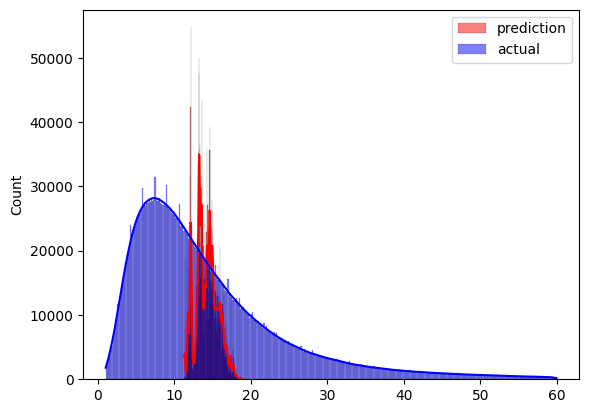

In [12]:
sns.histplot(y_pred, label="prediction", kde=True, color="red")
sns.histplot(y_train, label="actual", kde=True, color="blue")

plt.legend()

In [11]:
# now get validation data (2023-02)
df_val = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet")
df_val["duration"] = (df_val["tpep_dropoff_datetime"] - df_val["tpep_pickup_datetime"]).dt.total_seconds() / 60
df_val = df_val[(df_val["duration"] > 1) & (df_val["duration"] < 60)]

val_dicts = df_val[["PULocationID", "DOLocationID"]].to_dict(orient="records")
X_val = dv.transform(val_dicts)
y_val = df_val["duration"].values

y_pred = model.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

/Users/shaurya/code/mlops-zoomcamp/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.960653308122188

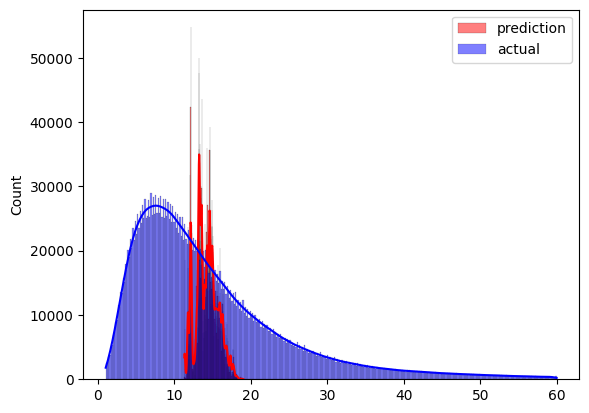

In [14]:
sns.histplot(y_pred, label="prediction", kde=True, color="red")
sns.histplot(y_val, label="actual", kde=True, color="blue")
_ = plt.legend()